# NLP Pipeline
## This notebook outlines the main concepts and phases involved in NLP pipeline

![NLP Pipeline](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_Pipeline.png)

## NLP Pipeline
- Data Acquisition
- Text Extraction
- Text Cleaning
- Text Pre-processing
- Feature Engineering**
- Modeling***
- Evaluation***
- Deployment****
- Monitoring & Model Improvement****




- **   Will be seen in detail in the next lecture

- ***  **Deep LearningI** course

- ****   **Full Stack Data Science Systems** course

### 1.  Data Acquisition

#### Use a public dataset

- Easily available
- If found a similar dataset that can work for your problem in hand
    - Download, build a model, evaluate the model

#### Scrape data

- Wiki pages
- Articles
- Webpages

    - Data annotation to be done later for labeling the scraped data

#### Product Intervention

- You have to work with product team
    - collect more data
    - very important

Pros
- Accurate

Cons
- Takes a long time

#### Data Augmentation

- Use a small dataset to create more data
    - Synonym replacement
        - Randomly choose "k" words in a sentence that are not stop words
        - Replace these words with their synonyms
    - Back Translation
    - TF-IDF-based word replacement
    - Bigram Flipping
    - Entity replacement
    - Noise addition

### 2. Text Extraction

- Process of extracting raw text from input data source
    - Remove all unwanted non-textual information
        - Markup data
        - Metadata

![Source formats](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_Text-formats.png)

### Web scraping
Scrape the following url and extract the text

URL: https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python


![Stack overflow page](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_Stackoverflow.png)



Task
- look at the url
- extract question
- extract answer
- Display them as shown below

This is **Text extraction from webpages**

In [7]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
myurl = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python"
html = urlopen(Request(myurl,headers={'User-Agent': 'Mozilla/5.0'}))
soupified = BeautifulSoup(html)


In [22]:
question_text = soupified.find(id = 'question').p
print(f"Question = \n {question_text.get_text().strip()}")
print("\n\n\n")

answer_text = soupified.find(id = 'answers')
answer =  answer_text.find('div',{'class':'s-prose js-post-body'})
print(f"Answer = \n {answer.get_text().strip()}")

Question = 
 How do I get the current time?




Answer = 
 Use datetime:
>>> import datetime
>>> now = datetime.datetime.now()
>>> now
datetime.datetime(2009, 1, 6, 15, 8, 24, 78915)
>>> print(now)
2009-01-06 15:08:24.789150

For just the clock time without the date:
>>> now.time()
datetime.time(15, 8, 24, 78915)
>>> print(now.time())
15:08:24.789150


To save typing, you can import the datetime object from the datetime module:
>>> from datetime import datetime

Then remove the prefix datetime. from all of the above.


### Extraction from PDF documents
- Use the following PDF to text converstion libraries
    - PyPDF
    - PDFMiner
    - PyPDF2
    - Fitz
    - ...

### Extraction from scanned images
- Use Tesseract OCR library
- Use wget to download the png

Task is to extract text from this url: https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_scanned_image.png

Input:

![Scanned Image](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_scanned_image.png)


Output:


’in the nineteenth century the only Kind of linguistics considered\nseriously
was this comparative and historical study of words in languages\nknown or
believed to Fe cognate—say the Semitic languages, or the Indo-\nEuropean
languages. It is significant that the Germans who really made\nthe subject what
it was, used the term Indo-germanisch. Those who know\nthe popular works of 
Otto Jespersen will remember how fitmly he\ndeclares that linguistic 
science is historical. And those who have noticed’

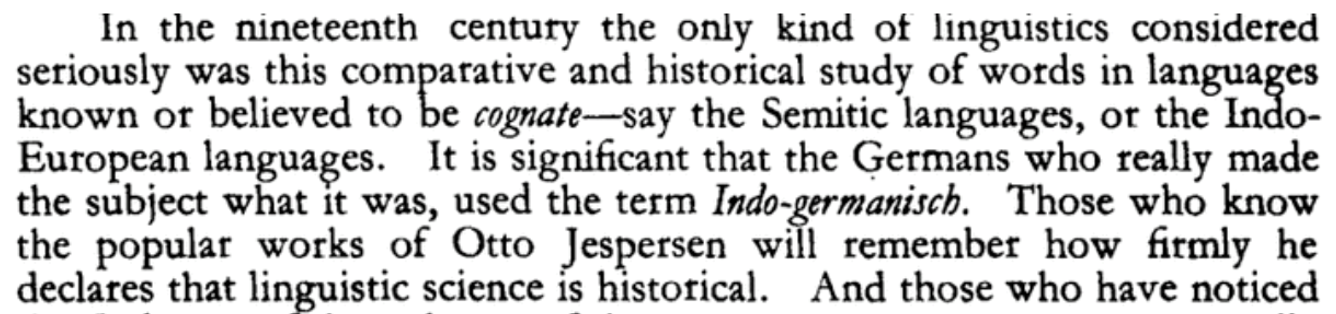

In [42]:
from PIL import Image
url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_scanned_image.png'
image = Image.open(urlopen(Request(url,headers={'User-Agent': 'Mozilla/5.0'})))
image

In [43]:
from pytesseract import image_to_string
print(image_to_string(image= image))

In the nineteenth century the only kind of linguistics considered
seriously was this comparative and historical study of words in languages
known or believed to be cognate—say the Semitic languages, or the Indo-
European languages. It is significant that the Germans who really made
the subject what it was, used the term Indo-germanisch. Those who know
the popular works of Otto Jespersen will remember how firmly he
declares that linguistic science is historical. And those who have noticed



### 3. Text Cleaning

#### Unicode Removal from text
- Remove non-textual symbols and special characters
- Use string.encode("utf-8")

I love this!!! 😊  Let's all be happy !😊

In [1]:
text = "I love this!!! 😊  Let's all be happy !😊"

Sentiment Analysis
- Tweets
- Articles
- Any text
- Emoji Classifier

In [3]:
print(text.encode("utf-8"))

b"I love this!!! \xf0\x9f\x98\x8a  Let's all be happy !\xf0\x9f\x98\x8a"


#### Spelling Correction
- textblob
- pyspellchecker
- Microsoft's API Spell Checker

#### textblob
- pip install textblob
- Import TextBlob from textblob
- Use TextBlob(string).correct()

In [2]:
! pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [12]:
from textblob import TextBlob

In [7]:
a = "maching moter fucker"

In [8]:
b = TextBlob(a)

In [9]:
corrected_word = str(b.correct())
corrected_word

'machine mother pucker'

#### pyspellchecker : https://pyspellchecker.readthedocs.io/en/latest/
- pip install pyspellchecker
- Import SpellChecker from spellchecker
- Use SpellChecker.unknown(incorrect_string)
- Iterate through misspelled using
    - SpellChecker.correction(word)
    - SpellChecker.candidates(word)

In [17]:
! pip install pyspellchecker

  Using cached pyspellchecker-0.5.6-py2.py3-none-any.whl (2.5 MB)


In [18]:
from spellchecker import SpellChecker

In [19]:
spell = SpellChecker()

In [20]:
word = 'computr'

In [22]:
misspellings = spell.unknown([word])
misspellings

{'computr'}

In [24]:
spell.correction(word)

'computer'

In [25]:
spell.candidates(word)

{'compute', 'computer'}

#### Microsoft's API Spell Checker
- API Request from a Python client application example

In [ ]:
import requests
import json

api_key = "<ENTER-KEY-HERE>"
example_text = "Hollo, wrld" 

data = {'text': example_text}
params = {
    'mkt':'en-us',
    'mode':'proof'
    }
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'Ocp-Apim-Subscription-Key': api_key,
    }
response = requests.post(endpoint, headers=headers, params=params, data=data)
json_response = response.json()
print(json.dumps(json_response, indent=4))

### 4. Text Pre-processing
### Process of preparing raw text and extract knowledge
- Sentence Segmentation
- Word Tokenization
- Stop words
- Stemming & Lemmatization
- Contractions
- Whitespace
- POS tagging
- Parsing
- Entity

#### Sentence Segmentation : Breaking big document into sentences
- nltk
- sent_tokenize()

##### Task: Given a piece of text, split them into sentences, and print them one by one

In [26]:
mytext = """In the previous chapter, we saw examples of some common NLP applications that we might encounter in everyday life. If we were asked to build such an application, think about how we would approach doing so at our organization. We would normally walk through the requirements and break the problem down into several sub-problems, then try to develop a step-by-step procedure to solve them. Since language processing is involved, we would also list all the forms of text processing needed at each step. This step-by-step processing of text is known as pipeline. """

In [27]:
! pip install nltk

In [28]:
from nltk.tokenize import sent_tokenize

In [29]:
sentences = sent_tokenize(mytext)
sentences

['In the previous chapter, we saw examples of some common NLP applications that we might encounter in everyday life.',
 'If we were asked to build such an application, think about how we would approach doing so at our organization.',
 'We would normally walk through the requirements and break the problem down into several sub-problems, then try to develop a step-by-step procedure to solve them.',
 'Since language processing is involved, we would also list all the forms of text processing needed at each step.',
 'This step-by-step processing of text is known as pipeline.']

In [33]:
# for sent in sentences:
#     print(sent)

for idx, sentence in enumerate(sentences):
    print(f"Sentence {idx+1}\n {sentence}")
    
    

Sentence 1
 In the previous chapter, we saw examples of some common NLP applications that we might encounter in everyday life.
Sentence 2
 If we were asked to build such an application, think about how we would approach doing so at our organization.
Sentence 3
 We would normally walk through the requirements and break the problem down into several sub-problems, then try to develop a step-by-step procedure to solve them.
Sentence 4
 Since language processing is involved, we would also list all the forms of text processing needed at each step.
Sentence 5
 This step-by-step processing of text is known as pipeline.


#### Word Tokenization : Breaking a sentence into words (tokens)
- word_tokenize()

##### Task: Given a sentence, split them into words and print them

In [35]:
sentence = "This step-by-step processing of text is known as pipeline."

In [34]:
from nltk.tokenize import word_tokenize

In [36]:
words = word_tokenize(sentence)

In [37]:
words

['This',
 'step-by-step',
 'processing',
 'of',
 'text',
 'is',
 'known',
 'as',
 'pipeline',
 '.']

['This', 'step-by-step', 'processing', 'of', 'text', 'is', 'known', 'as', 'pipeline', '.']


#### Removal Stop Words : Removing words that would be useless to our processing
- import stopwords from corpus
- Check 
    - if the present word is not a stop word, allow it
    - else throw it away

In [39]:
from nltk.corpus import stopwords

In [40]:
stop_words = stopwords.words('english')

In [44]:
clean_words = [word for word in words if word not in stop_words]
clean_words

['This', 'step-by-step', 'processing', 'text', 'known', 'pipeline', '.']

In [46]:
c_words = [word if word != "This" else 'NA' for word in words]

In [47]:
c_words

['NA',
 'step-by-step',
 'processing',
 'of',
 'text',
 'is',
 'known',
 'as',
 'pipeline',
 '.']

### Stemming : Reduces the word to a base form
- PorterStemmer.stem()

In [48]:
from nltk.stem import porter

In [49]:
stemmer = porter.PorterStemmer()

In [67]:
stemmer.stem("airline")

'airlin'

### Lemmatization : Reducing the word to a base form (available in dictionary)
- WordNetLemmatizer.lemmatize()

In [51]:
from nltk.stem import WordNetLemmatizer

In [52]:
lemmatizer = WordNetLemmatizer()

In [70]:
lemmatizer.lemmatize("airlines", pos="n")

'airline'

### Which is better ? Stemming or Lemmatization?
- Try some samples and make a decision
    - well-dressed
    - better
    - airliner
    - was
    - meeting
    - go
    - went
    - going

In [53]:
word_list = ['well-dressed', 'airliner', 'better', 'was', 'meeting', 'uncomfortable']

In [ ]:
10000 samples in Class A
1000 samples in Class B
Imbalanced dataset

1000 samples in Class A
1000 samples in Class B
Balanced dataset

10000 samples in Class A
10000 samples in Class B (duplicate 10 times of your sample size)
Balanced dataset

5000 samples in Class A (Down sampling - reduce half of your sample size)
5000 samples in Class B (Up Sampling - increase your sample size)
Balanced dataset

SMOTE to take care of imbalanced dataset


### Contractions : Expanding contractions
- Use Regular expressions
    - don't --> do not
    - isn't --> is not
    - aren't --> are not
    - we're --> we are
    - they're --> they are

In [71]:
test_sentence = "Everything we’re doing now is great. However, we don't want to relax now. And this isn't the time to relax at all."

In [72]:
import re
pattern = r'we[\’\']re'
replacement = 'we are'
expanded_sentence = re.sub(pattern,replacement,test_sentence)
print(expanded_sentence)

Everything we are doing now is great. However, we don't want to relax now. And this isn't the time to relax at all.


#### Generalize the contraction expansion

In [94]:
pattern = r'\w[\’\']\w'
replacement = ' are'
expanded_sentence = re.sub(pattern,replacement,test_sentence)
print(expanded_sentence)

Everything w are doing now is great. However, we don't want to relax now. And this isn't the time to relax at all.


#### Write one regular expression for don't types

In [95]:
pattern = r'\w[\’\']t'
replacement = ' not'
expanded_sentence = re.sub(pattern,replacement,test_sentence)
print(expanded_sentence)

Everything we’re doing now is great. However, we do not want to relax now. And this is not the time to relax at all.


### POS Tagging : Finding the Parts-Of-Speech of words
- Use spacy
- pip install spacy
- python -m spacy download en_core_web_sm

In [73]:
! pip install spacy

#### Load Spacy Language Model

In [74]:
! python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 4.6 MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047106 sha256=fe80052a42655b2363936cfd0d2bf4fa890c2501170782167dd2ae93767c7f6c
  Stored in directory: /private/var/folders/fk/czyq5vyj5hq3k3g6mjkj2xkh0000gn/T/pip-ephem-wheel-cache-123l1qar/wheels/ee/4d/f7/563214122be1540b5f9197b52cb3ddb9c4a8070808b22d5a84
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [76]:
import spacy

In [77]:
nlp = spacy.load('en_core_web_sm')

In [106]:
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")

In [107]:
doc = nlp(text)
doc

When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously. “I can tell you very senior CEOs of major American car companies would shake my hand and turn away because I wasn’t worth talking to,” said Thrun, in an interview with Recode earlier this week.

#### Find noun phrases in the document

In [82]:
for noun in doc.noun_chunks:
    print(noun)

Sebastian Thrun
self-driving cars
Google
few people
the company
him
I
you
very senior CEOs
major American car companies
my hand
I
Thrun
an interview
Recode


#### Verbs

In [90]:
for word in doc:
    if word.pos_ == "VERB":
        print(word)

started
working
driving
took
can
tell
would
shake
turn
talking
said


#### Adjectives

In [93]:
for word in doc:
    if word.pos_ == "ADJ":
        print(word)

few
senior
major
American
worth


#### Entities

In [95]:
for entity in doc.ents:
    print(entity, entity.label_)

Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun PERSON
Recode LOC
earlier this week DATE


### Parsing

In [99]:
# Sentence Chunks - phrases
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_)

Sebastian Thrun Thrun nsubj
self-driving cars cars pobj
Google Google pobj
few people people nsubj
the company company pobj
him him dobj
I I nsubj
you you dative
very senior CEOs CEOs nsubj
major American car companies companies pobj
my hand hand dobj
I I nsubj
Thrun Thrun nsubj
an interview interview pobj
Recode Recode pobj


### Displacy

In [104]:
text = "I am looking at you. You better watch out."
text = "Thrun, who heads GoogleX, was also teaching in MOOC."
doc = nlp(text)

In [105]:
from spacy import displacy
displacy.render(doc, style='dep')

### Entity Recognition

In [108]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Sebastian Thrun 5 20 PERSON
Google 61 67 ORG
2007 71 75 DATE
American 173 181 NORP
Thrun 271 276 PERSON
Recode 299 305 LOC
earlier this week 306 323 DATE


In [109]:
displacy.render(doc, style='ent')

### Coreference Resolution
- Resolving what sets of pronouns or nouns in a set of sentences link to the same person or thing

- Use neuralcoref

In [110]:
! pip install neuralcoref

Processing /Users/subashgandyer/Library/Caches/pip/wheels/2c/0b/d4/be6e85f480e2a238aaa98182f52eb6fc410c25b705ffb3b1e9/neuralcoref-4.0-cp38-cp38-macosx_10_9_x86_64.whl
     |████████████████████████████████| 130 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 5.5 MB/s eta 0:00:01     |█████████▎                      | 2.1 MB 2.8 MB/s eta 0:00:02     |██████████████████              | 4.1 MB 2.8 MB/s eta 0:00:02
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
  Using cached s3transfer-0.3.4-py2.py3-none-any.whl (69 kB)


In [1]:
import neuralcoref

<frozen importlib._bootstrap>:219: RuntimeWarning: spacy.morphology.Morphology size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: spacy.vocab.Vocab size changed, may indicate binary incompatibility. Expected 96 from C header, got 112 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: spacy.tokens.span.Span size changed, may indicate binary incompatibility. Expected 72 from C header, got 80 from PyObject


In [113]:
neuralcoref.add_to_pipe(nlp)

In [117]:
elon_text = """Musk was born to a Canadian mother and South African father  and raised in Pretoria, South Africa.  He briefly attended the University of Pretoria before moving to Canada  when he was 17 to attend Queen's University. """

In [114]:
elon_text = """Musk was born to a Canadian mother and South African father 
and raised in Pretoria, South Africa. 
He briefly attended the University of Pretoria before moving to Canada 
when he was 17 to attend Queen's University. 
He transferred to the University of Pennsylvania two years later, 
where he received dual bachelor's degrees in economics and physics. 
He moved to California in 1995 to begin a Ph.D. in 
applied physics and material sciences at Stanford University 
but dropped out after two days to pursue a business career, 
co-founding web software company Zip2 with his brother Kimbal. 
The start-up was acquired by Compaq for $307 million in 1999. Musk co-founded online bank X.com that same year, which merged with Confinity in 2000 to form the company PayPal and was subsequently bought by eBay in 2002 for $1.5 billion."""

In [ ]:
doc = nlp(elon_text)

### 5. Feature Engineering
- Set of methods that will accomplish the task of extracting features for model building
- Converting pieces of text into some numeric vectors

#### Two major categories
- Classical NLP / ML Pipeline
- Deep Learning Pipeline

#### Classical NLP
![Classical NLP](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_Classical_FE.png)


- Converts the raw data into a format that can be consumed by a machine
- Convert text into **numerical vectors**
- In Classical NLP, feature extraction is **handcrafted or hand-engineered** by domain experts who are solving the problem

### Deep Learning NLP
![DL NLP](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_DL_FE.png)

- Feature Extraction happens automatically as part of the model training process
- **Neurons** extract features

### 6. Modeling
- Process of building a model with the data
    - Simple Heuristics
        - Regular Expressions
        - Rule-baased approaches
    - Probabilistic models
        - HMM
        - CRF
    - Neural Network models
        - RNN
        - LSTM
    - Ensemble models
    - Transfer learning

![Modeling Principles](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_Modeling.png)

### 7. Evaluation : Measuring how good the model is
- Use the right metric
    - 10000 samples of no fraud
    - 100 samples of fraud
    - 10100 samples -- 99% accuracy 
- Follow the right evaluation process

Types of Evaluation
- Intrinsic evaluation
- Extrinsic evaluation

#### Intrinsic Evaluation

![Intrinsic Evaluation_1](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_Intrinsic_Evaluation1.png)


![Intrinsic Evaluation_2](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_Intrinsic_Evaluation2.png)

![Intrinsic Evaluation_3](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_Intrinsic_Evaluation3.png)

#### Extrinsic Evaluation

- Involves the business metrics outside the AI/ML team

Takeway
- First, check if you achieve good intrinsic evaluation metric
- Then, go for extrinsic evaluation

### 8. Deployment : Serving the built models to the customers
Major cloud providers
- Google Cloud Platform (GCP) \$300 credit
- Amazon Web Services (AWS) \$300 credit
- Microsoft Azure \$300 credit
- Heroku (free)
- Python nowhere (free)

### 9. Monitoring & Model Updation
- Monitoring of models' efficiency must be done on a constant real-time basis
- Performance dashboards to be included in the project

![Monitoring](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/NLP_Monitoring.png)